## **Linear Regression with Python Scikit Learn**
#### In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### Author- Ajay Calambur

### **Simple Linear Regression**
#### In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('1st task.csv')

In [3]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

Text(0, 0.5, 'Marks/Scores')

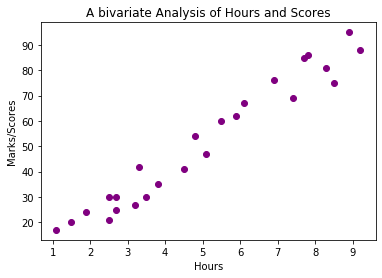

In [5]:
plt.scatter(data['Hours'],data['Scores'],c='purple')
plt.title('A bivariate Analysis of Hours and Scores')
plt.xlabel('Hours')
plt.ylabel('Marks/Scores')

#### **We can see a linear relation between the hours and the scores from this scatter plot and thus we will use linear regression**

#### The Below line shuffles the data in our dataset, so that the order can be randomized.

In [6]:
data_new=data.sample(frac=1).reset_index(drop=True)

In [7]:
data_new

,Hours,Scores
0,5.1,47
1,6.9,76
2,3.8,35
3,8.9,95
4,3.5,30
5,5.9,62
6,1.9,24
7,9.2,88
8,2.5,21
9,7.4,69


#### Data identification: We will assign Hours as our independent variable and Scores as our dependent variable
#### The equation will be 
* y=W*x+b
###### Here W is the weights and b is the bias value.  

In [8]:
x=data_new['Hours']
y=data_new['Scores']

In [9]:
x.shape,y.shape

((25,), (25,))

##### We reshape these values to convert into vector form

In [10]:
x=x.values.reshape(-1,1)
y=y.values.reshape(-1,1)

In [11]:
x.shape,y.shape

((25, 1), (25, 1))

#### We need to split the data so that we can see how well it works on test sets and accordingly compare.

In [12]:
from sklearn.model_selection import train_test_split as tts
train_x,test_x,train_y,test_y=tts(x,y,test_size=0.2,random_state=10)

In [13]:
from sklearn.linear_model import LinearRegression 

In [14]:
lr=LinearRegression()

In [15]:
#train_x=train_x.values.reshape(-1,1)
#train_y=train_y.values.reshape(-1,1)
#test_x=test_x.values.reshape(-1,1)
#test_y=test_y.values.reshape(-1,1)

In [16]:
train_x.shape

(20, 1)

In [17]:
train_y.shape

(20, 1)

#### Fitting the model by feeding it the train set values

In [18]:
lr.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
lr.score(test_x,test_y)

0.903718120624991

#### lr.score gives the accuracy level ,lr.coef_ is the weights and lr.intercept_ is the bias values

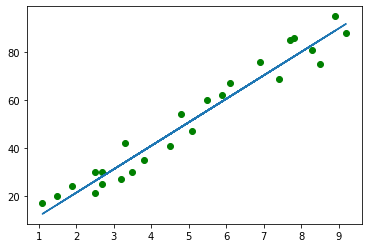

In [20]:
line = lr.coef_*x+lr.intercept_

# Plotting for the test data
plt.scatter(x, y,c='green')
plt.plot(x, line);
plt.show()

In [21]:
y_pred=lr.predict(test_x)

### Evaluating the model

In [22]:
from sklearn.metrics import mean_absolute_error

In [23]:
mean_absolute_error(test_y,y_pred)

4.984541764921755

In [24]:
a=np.array(y_pred)
a

array([[59.4986538 ],
       [69.29819526],
       [26.18021285],
       [38.91961674],
       [34.01984601]])

In [25]:
test_y

array([[62],
       [76],
       [30],
       [35],
       [42]], dtype=int64)

In [26]:
a,test_y

(array([[59.4986538 ],
        [69.29819526],
        [26.18021285],
        [38.91961674],
        [34.01984601]]), array([[62],
        [76],
        [30],
        [35],
        [42]], dtype=int64))

#### Giving our own input and checking how it works 

In [27]:
hours=[[5.3]]
c=lr.predict(hours)
print(c)

[[53.61892893]]
